### baseline_lgb_0828_2212.csv

<ul>
<li> changed bureau balance / bureau features to kernel version <br>
    (with aggretaion on active or closed credits) </li>
<li> changed previous apprications to kernel version <br>
    (with aggregation on active or closed credits) </li>
</ul>


In [90]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [91]:
FILEPATH_APPLICATION_TRAIN     = "../data/application_train.csv.f"
FILEPATH_APPLICATION_TEST      = "../data/application_test.csv.f"



# aggregated features
FILEPATH_BUREAU_AGG                  = "../data/bureau_agg_0827.csv.f"
FILEPATH_FEATURE_PREV_APP            = "../data/prev_app_feature_0827.csv.f"
FILEPATH_FEATURE_INSTALLMENT_PAYMENT = "../data/prev_insallment_payment_feature_0819.csv.f"
FILEPATH_FEATURE_CC_BALANCE          = "../data/prev_credit_card_balance_feature_0824_1.csv.f"
FILEPATH_FEATURE_CC_BALANCE_3M       = "../data/feature_cc_balance_3m_0824_1.csv.f"
FILEPATH_FEATURE_CC_BALANCE_6M       = "../data/feature_cc_balance_6m_0824_1.csv.f"
FILEPATH_FEATURE_CC_BALANCE_12M      = "../data/feature_cc_balance_12m_0824_1.csv.f"

FILEPATH_FEATURE_POS_CASH_BALANCE    = "../data/POS_CASH_balance_feature_0824_1.csv.f"


In [92]:
df_app_train = pd.read_feather(FILEPATH_APPLICATION_TRAIN)
df_app_test  = pd.read_feather(FILEPATH_APPLICATION_TEST)
#df_app_train = pd.read_csv('../data/application_train.csv.zip', nrows=10000)



df_bureau_agg = pd.read_feather(FILEPATH_BUREAU_AGG)
df_feature_prev_app = pd.read_feather(FILEPATH_FEATURE_PREV_APP)
df_feature_inst_payment = pd.read_feather(FILEPATH_FEATURE_INSTALLMENT_PAYMENT)
df_feature_cc_balance = pd.read_feather(FILEPATH_FEATURE_CC_BALANCE)
df_feature_cc_balance_3m  = pd.read_feather(FILEPATH_FEATURE_CC_BALANCE_3M)
df_feature_cc_balance_6m  = pd.read_feather(FILEPATH_FEATURE_CC_BALANCE_6M)
df_feature_cc_balance_12m = pd.read_feather(FILEPATH_FEATURE_CC_BALANCE_12M)
df_feature_pos_cash_balance = pd.read_feather(FILEPATH_FEATURE_POS_CASH_BALANCE)


In [93]:
df_app_train.shape

(307511, 122)

In [94]:
df_app_test.shape

(48744, 121)

### condatenate train and test data

In [95]:
df_app_all = pd.concat([df_app_train, df_app_test])
del df_app_train
del df_app_test

In [96]:
df_app_all.shape

(356255, 122)

In [97]:
df_app_all['TARGET'].value_counts()

0.0    282686
1.0     24825
Name: TARGET, dtype: int64

### Replace outliers

In [98]:
# Replace some outliers
df_app_all['DAYS_EMPLOYED'].replace(365243, np.nan, inplace = True)
df_app_all.loc[df_app_all['OWN_CAR_AGE'] > 80, 'OWN_CAR_AGE'] = np.nan
df_app_all.loc[df_app_all['REGION_RATING_CLIENT_W_CITY'] < 0, 'REGION_RATING_CLIENT_W_CITY'] = np.nan
df_app_all.loc[df_app_all['AMT_INCOME_TOTAL'] > 1e8, 'AMT_INCOME_TOTAL'] = np.nan
df_app_all.loc[df_app_all['AMT_REQ_CREDIT_BUREAU_QRT'] > 10, 'AMT_REQ_CREDIT_BUREAU_QRT'] = np.nan
df_app_all.loc[df_app_all['OBS_30_CNT_SOCIAL_CIRCLE'] > 40, 'OBS_30_CNT_SOCIAL_CIRCLE'] = np.nan
    

In [99]:
df_app_all.columns

Index(['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       ...
       'TARGET', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE',
       'WEEKDAY_APPR_PROCESS_START', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BUILD_AVG', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE'],
      dtype='object', length=122)

### join other tables

In [100]:
df_app_all = pd.merge(df_app_all, df_bureau_agg, on = 'SK_ID_CURR', how='left')
df_app_all = pd.merge(df_app_all, df_feature_prev_app, on = 'SK_ID_CURR', how='left')
df_app_all = pd.merge(df_app_all, df_feature_inst_payment, on = 'SK_ID_CURR', how='left')
df_app_all = pd.merge(df_app_all, df_feature_cc_balance, on = 'SK_ID_CURR', how='left')
df_app_all = pd.merge(df_app_all, df_feature_cc_balance_3m, on = 'SK_ID_CURR', how='left')
df_app_all = pd.merge(df_app_all, df_feature_cc_balance_6m, on = 'SK_ID_CURR', how='left')
df_app_all = pd.merge(df_app_all, df_feature_cc_balance_12m, on = 'SK_ID_CURR', how='left')
df_app_all = pd.merge(df_app_all, df_feature_pos_cash_balance, on = 'SK_ID_CURR', how='left')




In [101]:
df_app_all.shape

(356255, 634)

In [102]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [103]:
# Missing values statistics
missing_values = missing_values_table(df_app_all)
missing_values.head(20)

Your selected dataframe has 634 columns.
There are 583 columns that have missing values.


,Missing Values,% of Total Values
REFUSED_AMT_DOWN_PAYMENT_MEAN,303650,85.2
REFUSED_RATE_DOWN_PAYMENT_MIN,303650,85.2
REFUSED_RATE_DOWN_PAYMENT_MAX,303650,85.2
REFUSED_RATE_DOWN_PAYMENT_MEAN,303650,85.2
REFUSED_AMT_DOWN_PAYMENT_MIN,303650,85.2
REFUSED_AMT_DOWN_PAYMENT_MAX,303650,85.2
REFUSED_APP_CREDIT_PERC_VAR,298035,83.7
cc_bal__3mAMT_PAYMENT_CURRENT,285314,80.1
cc_bal__6mAMT_PAYMENT_CURRENT,285314,80.1
cc_bal__12mAMT_PAYMENT_CURRENT,285314,80.1


In [104]:
# Number of each type of column
df_app_all.dtypes.value_counts()

float64    580
int64       38
object      16
dtype: int64

In [105]:
# Number of unique classes in each object column
df_app_all.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

CODE_GENDER                    3
EMERGENCYSTATE_MODE            2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
NAME_CONTRACT_TYPE             2
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
NAME_INCOME_TYPE               8
NAME_TYPE_SUITE                7
OCCUPATION_TYPE               18
ORGANIZATION_TYPE             58
WALLSMATERIAL_MODE             7
WEEKDAY_APPR_PROCESS_START     7
dtype: int64

### Encoding Categorical Values(1) Target Encoding

As for OCCUPATION_TYPE and ORGANIZATION_TYPE, execute target encoding.

In [106]:
from sklearn.model_selection import KFold
target_enc_cols = ['OCCUPATION_TYPE', 'ORGANIZATION_TYPE']

for target_enc_col in target_enc_cols:
    print(target_enc_col)
    target_mean = df_app_all.groupby(target_enc_col).TARGET.mean()
    df_app_all[target_enc_col] = df_app_all[target_enc_col].map(target_mean)


OCCUPATION_TYPE
ORGANIZATION_TYPE


In [107]:
df_app_all['OCCUPATION_TYPE'].head()

0    0.105788
1    0.063040
2    0.105788
3    0.105788
4    0.063040
Name: OCCUPATION_TYPE, dtype: float64

### Encoding Categorical Values

columns which have two unique values            -> Label Encoding<br>
columns which have more than three unique values -> One-hot Encoding

In [108]:
KEY_COLUMN = 'SK_ID_CURR'



label encoding

In [109]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in df_app_all:
    if df_app_all[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(df_app_all[col].unique())) <= 2:
            # Train on the training data
            le.fit(df_app_all[col])
            # Transform both training and testing data
            df_app_all[col] = le.transform(df_app_all[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
        else:
            df_app_all.drop(columns = col, inplace=True)
print('%d columns were label encoded.' % le_count)

print('shape :', df_app_all.shape)

3 columns were label encoded.
shape : (356255, 623)


One-hot encoding

In [110]:
# one-hot encoding of categorical variables
df_app_all = pd.get_dummies(df_app_all)
print('shape :', df_app_all.shape)


shape : (356255, 623)


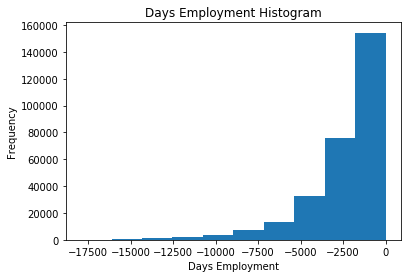

In [111]:
df_app_all['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [112]:
anom = df_app_all[df_app_all['DAYS_EMPLOYED'] == 365243]
non_anom = df_app_all[df_app_all['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.07% of loans
The anomalies default on nan% of loans
There are 0 anomalous days of employment


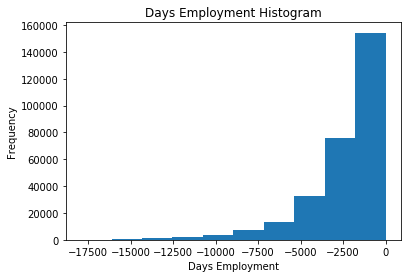

In [113]:
# Create an anomalous flag column
df_app_all['DAYS_EMPLOYED_ANOM'] = df_app_all["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
df_app_all['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

df_app_all['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [114]:
# Find the correlation of the positive days since birth and target
df_app_all['DAYS_BIRTH'] = abs(df_app_all['DAYS_BIRTH'])
df_app_all['DAYS_BIRTH'].corr(df_app_all['TARGET'])

-0.07823930830982709

In [115]:
df_app_all.columns

Index(['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       ...
       'pcb_NAME_CONTRACT_STATUS_Returned to the store_sum_sum',
       'pcb_NAME_CONTRACT_STATUS_Signed_sum_sum',
       'pcb_NAME_CONTRACT_STATUS_Amortized debt_avg',
       'pcb_NAME_CONTRACT_STATUS_Approved_avg',
       'pcb_NAME_CONTRACT_STATUS_Canceled_avg',
       'pcb_NAME_CONTRACT_STATUS_Completed_avg',
       'pcb_NAME_CONTRACT_STATUS_Demand_avg',
       'pcb_NAME_CONTRACT_STATUS_Returned to the store_avg',
       'pcb_NAME_CONTRACT_STATUS_Signed_avg', 'DAYS_EMPLOYED_ANOM'],
      dtype='object', length=624)

### Add Extracted Features

In [116]:
app_all_domain = df_app_all.copy()

df_app_all['ap_ex_LOG_AMT_INCOME_TOTAL'] = np.log1p(df_app_all['AMT_INCOME_TOTAL'])
df_app_all['ap_ex_CREDIT_INCOME_PERCENT'] = df_app_all['AMT_CREDIT'] / df_app_all['AMT_INCOME_TOTAL']
df_app_all['ap_ex_ANNUITY_INCOME_PERCENT'] = df_app_all['AMT_ANNUITY'] / df_app_all['AMT_INCOME_TOTAL']
df_app_all['ap_ex_CREDIT_TERM'] = df_app_all['AMT_ANNUITY'] / df_app_all['AMT_CREDIT']
df_app_all['ap_ex_DAYS_EMPLOYED_PERCENT'] = df_app_all['DAYS_EMPLOYED'] / df_app_all['DAYS_BIRTH']

In [117]:
def aggregate_categorical_value(df, name_agg_col, name_cat_col, agg_funcs):
    for func in agg_funcs:
        colname = 'ap_ex_' + func + '_' + name_agg_col + '_' + name_cat_col 
        df_agg = df[[name_agg_col, name_cat_col]].groupby(name_cat_col).agg(func)[name_agg_col]
        df[colname] = df[name_cat_col].map(df_agg)
        
aggregate_categorical_value(df_app_all, 'AMT_INCOME_TOTAL', 'ORGANIZATION_TYPE', ['mean', 'median'])
aggregate_categorical_value(df_app_all, 'AMT_INCOME_TOTAL', 'OCCUPATION_TYPE', ['mean', 'median'])
#aggregate_categorical_value(df_app_all, 'AMT_INCOME_TOTAL', 'EXT_SOURCE_1', ['mean', 'median'])
#aggregate_categorical_value(df_app_all, 'AMT_INCOME_TOTAL', 'EXT_SOURCE_2', ['mean', 'median'])
#aggregate_categorical_value(df_app_all, 'AMT_INCOME_TOTAL', 'EXT_SOURCE_3', ['mean', 'median'])

aggregate_categorical_value(df_app_all, 'AMT_CREDIT', 'ORGANIZATION_TYPE', ['mean', 'median'])
aggregate_categorical_value(df_app_all, 'AMT_CREDIT', 'OCCUPATION_TYPE', ['mean', 'median'])
#aggregate_categorical_value(df_app_all, 'AMT_CREDIT', 'EXT_SOURCE_1', ['mean', 'median'])
#aggregate_categorical_value(df_app_all, 'AMT_CREDIT', 'EXT_SOURCE_2', ['mean', 'median'])
#aggregate_categorical_value(df_app_all, 'AMT_CREDIT', 'EXT_SOURCE_3', ['mean', 'median'])

#inc_by_org_mean     = df_app_all[['AMT_INCOME_TOTAL', 'ORGANIZATION_TYPE']].groupby('ORGANIZATION_TYPE').mean()['AMT_INCOME_TOTAL']
#inc_by_org_median   = df_app_all[['AMT_INCOME_TOTAL', 'ORGANIZATION_TYPE']].groupby('ORGANIZATION_TYPE').median()['AMT_INCOME_TOTAL']
#inc_by_occup_mean   = df_app_all[['AMT_INCOME_TOTAL', 'OCCUPATION_TYPE']].groupby('OCCUPATION_TYPE').mean()['AMT_INCOME_TOTAL']
#inc_by_occup_median = df_app_all[['AMT_INCOME_TOTAL', 'OCCUPATION_TYPE']].groupby('OCCUPATION_TYPE').median()['AMT_INCOME_TOTAL']

#df_app_all['ap_ex_mean_INC_BY_ORG'] = df_app_all['ORGANIZATION_TYPE'].map(inc_by_org_mean)
#df_app_all['ap_ex_medi_INC_BY_ORG'] = df_app_all['ORGANIZATION_TYPE'].map(inc_by_org_median)
#df_app_all['ap_ex_mean_INC_BY_OCCP'] = df_app_all['OCCUPATION_TYPE'].map(inc_by_org_mean)
#df_app_all['ap_ex_medi_INC_BY_OCCP'] = df_app_all['OCCUPATION_TYPE'].map(inc_by_org_median)

In [118]:
df_app_all.columns

Index(['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       ...
       'ap_ex_CREDIT_TERM', 'ap_ex_DAYS_EMPLOYED_PERCENT',
       'ap_ex_mean_AMT_INCOME_TOTAL_ORGANIZATION_TYPE',
       'ap_ex_median_AMT_INCOME_TOTAL_ORGANIZATION_TYPE',
       'ap_ex_mean_AMT_INCOME_TOTAL_OCCUPATION_TYPE',
       'ap_ex_median_AMT_INCOME_TOTAL_OCCUPATION_TYPE',
       'ap_ex_mean_AMT_CREDIT_ORGANIZATION_TYPE',
       'ap_ex_median_AMT_CREDIT_ORGANIZATION_TYPE',
       'ap_ex_mean_AMT_CREDIT_OCCUPATION_TYPE',
       'ap_ex_median_AMT_CREDIT_OCCUPATION_TYPE'],
      dtype='object', length=637)

In [119]:
docs = [_f for _f in df_app_all.columns if 'FLAG_DOC' in _f]
live = [_f for _f in df_app_all.columns if ('FLAG_' in _f) & ('FLAG_DOC' not in _f) & ('_FLAG_' not in _f)]


df_app_all['ap_ex_CREDIT_TO_ANNUITY_RATIO'] = df_app_all['AMT_CREDIT'] / df_app_all['AMT_ANNUITY']
df_app_all['ap_ex_CREDIT_TO_GOODS_RATIO'] = df_app_all['AMT_CREDIT'] / df_app_all['AMT_GOODS_PRICE']
df_app_all['ap_ex_DOC_IND_KURT'] = df_app_all[docs].kurtosis(axis=1)
df_app_all['ap_ex_LIVE_IND_SUM'] = df_app_all[live].sum(axis=1)
df_app_all['ap_ex_INC_PER_CHLD'] = df_app_all['AMT_INCOME_TOTAL'] / (1 + df_app_all['CNT_CHILDREN'])
df_app_all['ap_ex_EMPLOY_TO_BIRTH_RATIO'] = df_app_all['DAYS_EMPLOYED'] / df_app_all['DAYS_BIRTH']
df_app_all['ap_ex_ANNUITY_TO_INCOME_RATIO'] = df_app_all['AMT_ANNUITY'] / (1 + df_app_all['AMT_INCOME_TOTAL'])
df_app_all['ap_ex_SOURCES_PROD'] = df_app_all['EXT_SOURCE_1'] * df_app_all['EXT_SOURCE_2'] * df_app_all['EXT_SOURCE_3']
df_app_all['ap_ex_EXT_SOURCES_MEAN'] = df_app_all[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)
df_app_all['ap_ex_SCORES_STD'] = df_app_all[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].std(axis=1)
df_app_all['ap_ex_SCORES_STD'] = df_app_all['ap_ex_SCORES_STD'].fillna(df_app_all['ap_ex_SCORES_STD'].mean())
df_app_all['ap_ex_CAR_TO_BIRTH_RATIO'] = df_app_all['OWN_CAR_AGE'] / df_app_all['DAYS_BIRTH']
df_app_all['ap_ex_CAR_TO_EMPLOY_RATIO'] = df_app_all['OWN_CAR_AGE'] / df_app_all['DAYS_EMPLOYED']
df_app_all['ap_ex_PHONE_TO_BIRTH_RATIO'] = df_app_all['DAYS_LAST_PHONE_CHANGE'] / df_app_all['DAYS_BIRTH']
df_app_all['ap_ex_PHONE_TO_BIRTH_RATIO_EMPLOYER'] = df_app_all['DAYS_LAST_PHONE_CHANGE'] / df_app_all['DAYS_EMPLOYED']
df_app_all['ap_ex_CREDIT_TO_INCOME_RATIO'] = df_app_all['AMT_CREDIT'] / df_app_all['AMT_INCOME_TOTAL']


In [120]:
print(app_all_domain.shape)

(356255, 624)


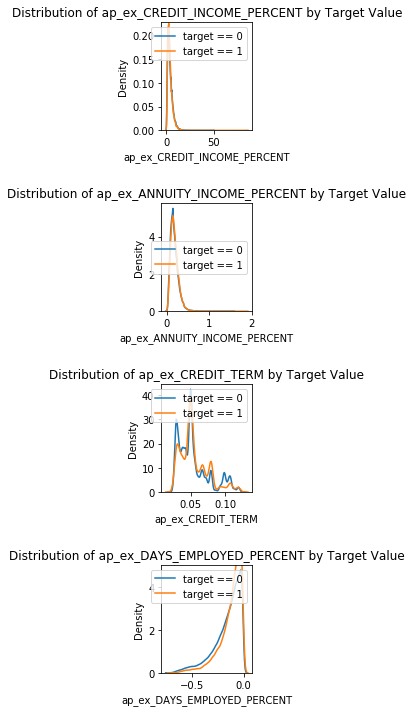

In [121]:
plt.figure(figsize = (4, 10))
# iterate through the new features
for i, feature in enumerate(['ap_ex_CREDIT_INCOME_PERCENT', 
                             'ap_ex_ANNUITY_INCOME_PERCENT', 
                             'ap_ex_CREDIT_TERM',
                             'ap_ex_DAYS_EMPLOYED_PERCENT']):
    
    # create a new subplot for each source
    plt.subplot(4, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(df_app_all.loc[df_app_all['TARGET'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(df_app_all.loc[df_app_all['TARGET'] == 1, feature], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

### split train and test

In [145]:
df_app_all.replace(np.inf,np.nan, inplace=True)


In [146]:
df_app_test = df_app_all[df_app_all['TARGET'].isnull()].drop(columns = ['TARGET'])
df_app_train = df_app_all[df_app_all['TARGET'].notnull()]



In [123]:
df_app_test.head()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,ap_ex_EMPLOY_TO_BIRTH_RATIO,ap_ex_ANNUITY_TO_INCOME_RATIO,ap_ex_SOURCES_PROD,ap_ex_EXT_SOURCES_MEAN,ap_ex_SCORES_STD,ap_ex_CAR_TO_BIRTH_RATIO,ap_ex_CAR_TO_EMPLOY_RATIO,ap_ex_PHONE_TO_BIRTH_RATIO,ap_ex_PHONE_TO_BIRTH_RATIO_EMPLOYER,ap_ex_CREDIT_TO_INCOME_RATIO
307511,20560.5,568800.0,450000.0,135000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.121044,0.152299,0.094803,0.567263,0.353601,NaN,NaN,-0.090432,0.747102,4.213333
307512,17370.0,222768.0,180000.0,99000.0,0.0,0.0,0.0,0.0,0.0,3.0,...,-0.247398,0.175453,0.071345,0.429869,0.136694,NaN,NaN,0.000000,-0.000000,2.250182
307513,69777.0,663264.0,630000.0,202500.0,0.0,0.0,0.0,1.0,0.0,4.0,...,-0.222477,0.344576,NaN,0.655389,0.062788,0.000250,-0.001122,-0.042719,0.192014,3.275378
307514,49018.5,1575000.0,1575000.0,315000.0,0.0,0.0,0.0,0.0,0.0,3.0,...,-0.133515,0.155614,0.164177,0.549372,0.055432,NaN,NaN,-0.129150,0.967310,5.000000
307515,32067.0,625500.0,625500.0,180000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.168021,0.178149,NaN,0.313916,0.158068,0.001227,-0.007303,-0.062960,0.374715,3.475000


In [124]:
from sklearn.model_selection import KFold, StratifiedKFold, StratifiedShuffleSplit
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, Imputer
import lightgbm as lgb
import gc

lgb_params_org = {
    'num_iterations':2000,
    'num_leaves':31,
    'objective': 'binary', 
    'learning_rate':0.1, 
    'reg_alpha':1, 
    'reg_lambda':0.1, 
    'min_split_gain':.1,
    'min_child_weight':3,
    'boosting_type':'gbdt',
    'metric':'auc',
    'subsample':0.9,
    'seed':50 ,
    'verbose':0
}

def kfold_predict_lgb(features, test_features, n_folds = 5):
    
    # Extract the ids
    train_ids = features['SK_ID_CURR']
    test_ids = test_features['SK_ID_CURR']    

    # Extract the labels for training
    labels = features['TARGET']
    
    # Remove the ids and target
    features = features.drop(columns = ['SK_ID_CURR', 'TARGET'])
    test_features = test_features.drop(columns = ['SK_ID_CURR'])

    # Extract feature names
    feature_names = list(features.columns)

    # Convert to np arrays
    features = np.array(features)
    test_features = np.array(test_features)

    print('Testing Data Shape: ', test_features.shape)
    
    # Create the kfold object
    k_fold = KFold(n_splits = n_folds, shuffle = True, random_state = 50)
    
    # Empty array for feature importances
    feature_importance_values = np.zeros(len(feature_names))
    
    # Empty array for test predictions
    test_predictions_lgb = np.zeros(test_features.shape[0])
    
    # Empty array for out of fold validation predictions
    out_of_fold = np.zeros(features.shape[0])
    
    # Lists for recording validation and training scores
    valid_scores = []
    train_scores = []
    
    # And here we create 2nd level feeature matrix, init it with zeros first
    X_train_level2 = np.zeros([train_ids.shape[0], 1])
    X_test_level2  = np.zeros([test_ids.shape[0], 1])
    
    # Iterate through each fold
    for train_indices, valid_indices in k_fold.split(features):
        
        # Training data for the fold
        train_features    = features[train_indices]
        train_labels      = labels[train_indices]                        
                                                            
        # Validation data for the fold
        valid_features    = features[valid_indices]
        valid_labels      = labels[valid_indices]
        
        ### LightGBM
        
        # Train the model
        lgb_train = lgb.Dataset(train_features, train_labels)
        lgb_eval = lgb.Dataset(valid_features, valid_labels, reference=lgb_train)
        
        lgb_params_cur = lgb_params_org.copy()
        model_lgb = lgb.train(lgb_params_cur,
                          train_set = lgb_train,
                          valid_sets = lgb_eval,
                          valid_names=['train','valid'], 
                          verbose_eval = 100,
                          early_stopping_rounds = 50)
        
        # Record the best iteration
        best_iteration = model_lgb.best_iteration
        
        # Record the feature importances
        feature_importance_values += model_lgb.feature_importance() / k_fold.n_splits
        
        # Make predictions
        train_preds_lgb = model_lgb.predict(train_features, num_iteration = best_iteration)
        valid_preds_lgb = model_lgb.predict(valid_features, num_iteration = best_iteration)
        test_pred_lgb   = model_lgb.predict(test_features, num_iteration = best_iteration)
        test_predictions_lgb += test_pred_lgb / k_fold.n_splits
        
        # Record the best score
        valid_score_lgb = roc_auc_score(valid_labels, valid_preds_lgb)
        train_score_lgb = roc_auc_score(train_labels, train_preds_lgb)
        valid_scores.append(valid_score_lgb)
        train_scores.append(train_score_lgb)
        
        print('Valid Score:{:.4f}, Train Score:{:.4f}'.format(valid_score_lgb, train_score_lgb))
        
        ### Put into Lv.2 Features
        X_train_level2[valid_indices, 0] = valid_preds_lgb
        
        # Clean up memory
        gc.enable()
        del model_lgb, train_features, valid_features
        gc.collect()
    
    # generate test predictions
    X_test_level2[:, 0] = test_predictions_lgb
    
    # Make the feature importance dataframe
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})

    return X_train_level2, X_test_level2, feature_importances

    


In [125]:
import xgboost as xgb

xgb_params = {
    'booster':'gbtree',
    'objective': 'binary:logistic', 
    'eval_metric':'auc',
    'max_depth':8,
    'lambda':0.1, 
    'metric':'auc',
    'subsample ':0.95,
    'eta':0.3,
    'seed':50 ,
    'silent':0
}

def kfold_predict_xgb(features, test_features, n_folds = 5):
    
    # Extract the ids
    train_ids = features['SK_ID_CURR']
    test_ids = test_features['SK_ID_CURR']    

    # Extract the labels for training
    labels = features['TARGET']
    
    # Remove the ids and target
    features = features.drop(columns = ['SK_ID_CURR', 'TARGET'])
    test_features = test_features.drop(columns = ['SK_ID_CURR'])

    # Extract feature names
    feature_names = list(features.columns)

    # Convert to np arrays
    features = np.array(features)
    test_features = np.array(test_features)

    print('Testing Data Shape: ', test_features.shape)
    
    # Create the kfold object
    k_fold = KFold(n_splits = n_folds, shuffle = True, random_state = 50)
    
    # Empty array for feature importances
    feature_importance_values = np.zeros(len(feature_names))
    
    # Empty array for test predictions
    test_predictions_xgb = np.zeros(test_features.shape[0])
    
    # Empty array for out of fold validation predictions
    out_of_fold = np.zeros(features.shape[0])
    
    # Lists for recording validation and training scores
    valid_scores = []
    train_scores = []
    
    # And here we create 2nd level feeature matrix, init it with zeros first
    X_train_level2 = np.zeros([train_ids.shape[0], 1])
    X_test_level2  = np.zeros([test_ids.shape[0], 1])
    
    # Iterate through each fold
    for train_indices, valid_indices in k_fold.split(features):
        
        # Training data for the fold
        train_features    = features[train_indices]
        train_labels      = labels[train_indices]                        
                                                            
        # Validation data for the fold
        valid_features    = features[valid_indices]
        valid_labels      = labels[valid_indices]
        
        ### XGBoost
        
        # Train the model
        xgb_train = xgb.DMatrix(train_features, label=train_labels) 
        model_xgb = xgb.train(xgb_params,
                          xgb_train)
        
        # Record the best iteration
        best_iteration = model_xgb.best_iteration
        
        # Make predictions
        xgb_valid = xgb.DMatrix(valid_features, label=valid_labels)
        xgb_test  = xgb.DMatrix(test_features)
        train_preds_xgb = model_xgb.predict(xgb_train)
        valid_preds_xgb = model_xgb.predict(xgb_valid)
        test_pred_xgb   = model_xgb.predict(xgb_test)
        test_predictions_xgb += test_pred_xgb / k_fold.n_splits
        
        # Record the best score
        valid_score_xgb = roc_auc_score(valid_labels, valid_preds_xgb)
        train_score_xgb = roc_auc_score(train_labels, train_preds_xgb)
        valid_scores.append(valid_score_xgb)
        train_scores.append(train_score_xgb)
        
        print('Valid Score:{:.4f}, Train Score:{:.4f}'.format(valid_score_xgb, train_score_xgb))
        
        ### Put into Lv.2 Features
        X_train_level2[valid_indices, 0] = valid_preds_xgb
        
        # Clean up memory
        gc.enable()
        del model_xgb, train_features, valid_features
        gc.collect()
    
    # generate test predictions
    X_test_level2[:, 0] = test_predictions_xgb
    
    # Make the feature importance dataframe
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})

    return X_train_level2, X_test_level2, feature_importances

    


In [126]:
X_train_level2_xgb, X_test_level2_xgb, fi_xgb = kfold_predict_xgb(df_app_train.copy(), df_app_test.copy())

Testing Data Shape:  (48744, 650)
Valid Score:0.7507, Train Score:0.8244
Valid Score:0.7509, Train Score:0.8251
Valid Score:0.7540, Train Score:0.8233
Valid Score:0.7511, Train Score:0.8264
Valid Score:0.7500, Train Score:0.8256


In [142]:
df_app_all.isnull().sum()
df_app_all.select_dtypes('object')

# Impute and Scale Features for logistic regression
# Median imputation of missing values# Scale each feature to 0-1
imputer = Imputer(strategy = 'median')
imputer.fit(df_app_all.copy())
ary_tmp = imputer.transform(df_app_all.copy())
print(np.isnan(ary_tmp).sum(), np.isinf(ary_tmp).sum())


0 5


In [127]:
# logistic regression with kfold
def kfold_predict_lr(features, test_features, n_folds = 5):

    # Extract the ids
    train_ids = features['SK_ID_CURR']
    test_ids = test_features['SK_ID_CURR']    

    # Extract the labels for training
    labels = features['TARGET']
    
    # Remove the ids and target
    features = features.drop(columns = ['SK_ID_CURR', 'TARGET'])
    test_features = test_features.drop(columns = ['SK_ID_CURR'])

  
    # Extract feature names
    feature_names = list(features.columns)
    
    # Impute and Scale Features for logistic regression
    # Median imputation of missing values
    # Scale each feature to 0-1
    imputer = Imputer(strategy = 'median')
    imputer.fit(features)

    features = imputer.transform(features)
    test_features = imputer.transform(test_features)

    scaler = MinMaxScaler(feature_range = (0, 1))
    scaler.fit(features)
    
    features = scaler.transform(features)
    test_features  = scaler.transform(test_features)

    # Convert to np arrays
    features = np.array(features)
    test_features  = np.array(test_features)

    print('Training Data Shape: ', features.shape)
        
    # Create the kfold object
    k_fold = KFold(n_splits = n_folds, shuffle = True, random_state = 50)
        
    # Empty array for test predictions
    test_predictions  = np.zeros(test_features.shape[0])
    
    # Empty array for out of fold validation predictions
    out_of_fold = np.zeros(features.shape[0])
    
    # Lists for recording validation and training scores
    valid_scores = []
    train_scores = []
    
    # And here we create 2nd level feeature matrix, init it with zeros first
    X_train_level2 = np.zeros([train_ids.shape[0], 1])
    X_test_level2  = np.zeros([test_ids.shape[0], 1])
    
    # Iterate through each fold
    for train_indices, valid_indices in k_fold.split(features):
        
        # Training data for the fold
        train_features = features[train_indices]
        train_labels   = labels[train_indices]                        
                                                            
        # Validation data for the fold
        valid_features = features[valid_indices]
        valid_labels   = labels[valid_indices]
        
        ### Linear Regression

        # Make the model with the specified regularization parameter
        log_reg = LogisticRegression(C = 0.0001)
        log_reg.fit(train_features, train_labels)
        train_preds = log_reg.predict_proba(train_features)[:, 1]
        valid_preds = log_reg.predict_proba(valid_features)[:, 1]
        test_preds  = log_reg.predict_proba(test_features)[:, 1]
        test_predictions += test_preds / k_fold.n_splits

        # Record the best score
        valid_score = roc_auc_score(valid_labels, valid_preds)
        train_score = roc_auc_score(train_labels, train_preds)
        valid_scores.append(valid_score)
        train_scores.append(train_score)
        
        print('Valid Score:{:.4f}, Train Score:{:.4f}'.format(valid_score, train_score))

        
        ### Put into Lv.2 Features
        X_train_level2[valid_indices, 0] = valid_preds
        
        # Clean up memory
        gc.enable()
        del train_features, valid_features
        gc.collect()
    
    # generate test predictions
    X_test_level2[:, 0] = test_predictions
    
    return X_train_level2, X_test_level2


In [147]:
X_train_level2_lr, X_test_level2_lr   = kfold_predict_lr(df_app_train.copy(), df_app_test.copy())


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [149]:
df_app_train(np.inf)

TypeError: 'DataFrame' object is not callable

In [ ]:
def plot_feature_importances(df):
    """
    Plot importances returned by a model. This can work with any measure of
    feature importance provided that higher importance is better. 
    
    Args:
        df (dataframe): feature importances. Must have the features in a column
        called `features` and the importances in a column called `importance
        
    Returns:
        shows a plot of the 15 most importance features
        
        df (dataframe): feature importances sorted by importance (highest to lowest) 
        with a column for normalized importance
        """
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 12))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:60]))), 
            df['importance_normalized'].head(60), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:60]))))
    ax.set_yticklabels(df['feature'].head(60))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

In [ ]:
X_train_level2_lgb, X_test_level2_lgb, fi_lgb = kfold_predict_lgb(df_app_train.copy(), df_app_test.copy())


In [ ]:
fi_sorted = plot_feature_importances(fi_lgb)

In [ ]:

X_train_level2 = np.c_[X_train_level2_lgb, X_train_level2_xgb, X_train_level2_lr]
X_test_level2  = np.c_[X_test_level2_lgb, X_test_level2_xgb, X_test_level2_lr]

In [ ]:
alphas_to_try = np.linspace(0, 1, 1001)
y_train_level2 = df_app_train['TARGET'] 

scores = np.array([roc_auc_score(y_train_level2,
                            alpha * X_train_level2[:, 0]+(1-alpha)*X_train_level2[:, 1])
                   for alpha in alphas_to_try])
plt.plot(alphas_to_try, scores)
best_alpha = alphas_to_try[scores.argmax()]

roc_train_simple_mix = scores.max()

print('Best alpha: %f; Corresponding auc score on train: %f' % (best_alpha, roc_train_simple_mix))



In [ ]:
test_ids = df_app_test['SK_ID_CURR']    
test_predictions = (X_test_level2_lgb * best_alpha + X_test_level2_xgb * (1-best_alpha))[:, 0]
#test_predictions = X_test_level2_lgb[:, 0]

test_ids.shape
test_predictions.shape

In [ ]:

# Make the submission dataframe
submission_df = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions})

In [ ]:
submission_df.to_csv('../submission/baseline_lgb_0829_2201.csv', index = False)

In [151]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
rf_X = X_train_level2
rf_y = y_train_level2
print(rf_y.shape)
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=50 ,verbose=0, warm_start=False)
y_pred = cross_val_predict(clf, rf_X, rf_y, method= 'predict_proba')[:, 1]
print(y_pred.shape)
print(y_pred)
print(rf_y.values)
roc = roc_auc_score(rf_y.values, y_pred)
print(roc)

(307511,)
(307511,)
[0.31751694 0.03401575 0.01639881 ... 0.08090792 0.07926625 0.09725831]
[1. 0. 0. ... 0. 1. 0.]
0.7793287020021482
